In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = ('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/')

import os
os.chdir(path)

In [92]:
df_raw = pd.read_csv('df_raw_v2.csv')

In [93]:
# bring year and target col to the beginning of df
year = df_raw.pop('year')
df_raw.insert(1, 'year', year)

dep = df_raw.pop('depressed')
df_raw.insert(2, 'depressed', dep)

# drop marijuana use
df_raw.drop(['used_marijuana'],axis=1, inplace=True)
df_raw.drop(['year'],axis=1, inplace=True)

In [94]:
df_raw.head()

,SEQN,depressed,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,caffeine,...,systolic_BP,diastolic_BP,BMI,waist_C,#meals_fast_food,min_sedetary,doc_HPV,bone_mineral_density,difficult_hearing,doc_COPD
0,31131.0,0.0,4.0,4.0,4.0,44.0,2.0,1.0,11.0,1.300000e+01,...,144.0,74.0,30.90,96.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31132.0,0.0,3.0,5.0,2.0,70.0,1.0,1.0,11.0,2.600000e+02,...,138.0,60.0,24.74,96.5,NaN,NaN,NaN,NaN,NaN,NaN
2,31134.0,0.0,3.0,3.0,2.0,73.0,1.0,1.0,NaN,1.420000e+02,...,130.0,68.0,30.63,117.1,NaN,NaN,NaN,NaN,NaN,NaN
3,31139.0,0.0,2.0,NaN,3.0,18.0,2.0,5.0,11.0,5.397605e-79,...,110.0,64.0,29.45,84.0,NaN,NaN,NaN,NaN,NaN,NaN
4,31143.0,0.0,3.0,NaN,3.0,19.0,1.0,5.0,11.0,5.397605e-79,...,108.0,62.0,22.57,84.2,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
def nan_helper(df):
    """
    The NaN helper

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN (index), 
    raw number missing, and their proportion
    
    """
    
    
    # get the raw number of missing values & sort
    missing = df.isnull().sum().sort_values(ascending=True)
    
    # get the proportion of missing values (%)
    proportion = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=True)
    
    # create table of missing data
    nan_data = pd.concat([missing, proportion], axis=1, keys=['missing', 'proportion'])
    
    return nan_data

nan_df = nan_helper(df_raw)

In [97]:
#continuous features
cont = ['#_ppl_household', 'age', 'triglyceride','caffeine', 'lifetime_partners',
       'glycohemoglobin', 'CRP', 'tot_cholesterol','systolic_BP','diastolic_BP', 'BMI', 'waist_C', '#meals_fast_food',
       'min_sedetary', 'bone_mineral_density']

# categorical features
cat = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI',
       'doc_diabetes', 'how_healthy_diet', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'alcoholic','herpes_2', 'HIV', 'doc_HPV','difficult_hearing', 'doc_COPD']

# target binary feature
target = 'depressed'



# multi-class features
cat_encode = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI','how_healthy_diet',
              'sexual_orientation']

In [98]:
def missing_values(df, threshold_col, threshold_row, impute_type):
    """
    Handle Missing Values

    Parameters
    ----------
    df : dataframe
    threshold_col: the proportion of missing values at which  to drop whole column
    threshold_row: the proportion of missing values at which to drop rows
    impute_type: mean or median imputation for continuous variables
    
    Returns
    ----------
    The dataframe without missing values
    
    """
    
    # Dropping Cols and Rows
    # call NaN helper function
    df_nan = nan_helper(df)
        
    # drop columns with higher proportion missing than threshold col
    df = df.drop((df_nan[df_nan['proportion'] > threshold_col]).index,1)
    
    # drop rows with higher proportion missing than threshold row
    df_nan_2 = df_nan[df_nan['proportion']>threshold_row]
    df = df.dropna(subset=np.intersect1d(df_nan_2.index, df.columns),
                           inplace=False)
    

    
    # Imputing values
    # Impute continuous variables with mean 
    if impute_type == 'mean':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].mean(), inplace=True)
    # Impute continuous variables with median
    elif impute_type == 'median':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].median(), inplace=True)
    
    
    # Impute categorical variables with most frequent/mode
    for col in cat:
        if col in df.columns:
            df[col].fillna(df[col].value_counts().index[0], inplace=True)
    

    return df

# Using Mean Imputation

In [99]:
# example input
df_mean = missing_values(df_raw, 0.65, 0.65, "mean")

In [100]:
df_mean.tail()

,SEQN,depressed,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,caffeine,...,glycohemoglobin,herpes_2,HIV,CRP,systolic_BP,diastolic_BP,BMI,waist_C,#meals_fast_food,min_sedetary
31352,93691.0,0.0,5.0,5.0,7.0,25.0,1.0,5.0,10.0,6.500000e+01,...,5.80000,0.0,0.0,0.433967,112.0,80.0,21.0,75.400000,2.096703,240.0
31353,93695.0,0.0,3.0,3.0,1.0,76.0,2.0,2.0,4.0,5.100000e+01,...,5.60000,0.0,0.0,0.433967,112.0,48.0,21.5,95.000000,0.000000,360.0
31354,93696.0,0.0,3.0,5.0,3.0,26.0,1.0,1.0,9.0,5.397605e-79,...,5.71477,0.0,0.0,0.433967,118.0,68.0,33.8,110.200000,1.000000,660.0
31355,93697.0,0.0,3.0,4.0,1.0,80.0,2.0,2.0,7.0,1.300000e+01,...,5.70000,0.0,0.0,0.433967,154.0,56.0,31.0,98.551302,1.000000,600.0
31356,93702.0,0.0,3.0,5.0,3.0,24.0,2.0,5.0,10.0,1.920000e+02,...,4.60000,0.0,0.0,0.433967,118.0,66.0,21.4,72.500000,0.000000,600.0


## Divide train & testing, Remove identifiers, Encode and Scale data

In [101]:
from sklearn.model_selection import train_test_split

# divide into training and testing
df_raw_train, df_raw_test = train_test_split(df_mean, test_size=0.2)

# Reset the index
df_raw_train, df_raw_test = df_raw_train.reset_index(drop=True), df_raw_test.reset_index(drop=True)

# drop the target col in the testing data
df_raw_test.drop([target], axis=1, inplace=True)

# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)


# # Divide the training data into training (80%) and validation (20%)
# df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# # Reset the index
# df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)


#%%-----------------------------------------------------------------------
# Handing the identifiers
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_test], sort=False)


def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe

    Returns
    ----------
    The dataframe of identifiers
    """

    # Get the identifiers
    df_id = df[[var for var in df.columns
                if df[var].nunique(dropna=True) == df[var].notnull().sum()]]

    return df_id


# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
print(df_id.head())


# removing the identifier
import numpy as np

# Remove the identifiers from df_train
df_train = df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns))

# Remove the identifiers from df_valid
# df_valid = df_valid.drop(columns=np.intersect1d(df_id.columns, df_valid.columns))

# Remove the identifiers from df_test
df_test = df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns))


#%%---------------------------------------------------------------------------
# encoding and scaline the data
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_test], sort=False)


# Function to One-hot-encode the categorical features
def one_hot_encode(df):
    cols = df.columns[1:]
    e_cols = list(set(cols).intersection(set(cat_encode)))
    df_encode = pd.get_dummies(df, columns=e_cols)

    return (df_encode)

df = one_hot_encode(df)

# encoding the categorical target
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# separeating training, testing, validation
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :].copy(deep=True)

# Separating the validation data
# df_valid = df.iloc[df_train.shape[0]:df_train.shape[0] + df_valid.shape[0], :].copy(deep=True)

# Separating the testing data
df_test = df.iloc[df_train.shape[0]:, :].copy(deep=True)


      SEQN
0  84576.0
1  80542.0
2  87292.0
3  35395.0
4  73585.0


In [102]:
# get the name of the features
features = np.setdiff1d(df.columns, [target])


# Get the feature matrix
X_train = df_train[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_test = df_test[target].astype(int).to_numpy()


from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the testing data
X_test = ss.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# from sklearn.model_selection import GridSearchCV

# def GridSearchCVWrapper(model, param_grid, X, y, n_jobs=-1, cv=10):
#     clf_cv = GridSearchCV(model, param_grid=param_grid,
#                           n_jobs=n_jobs, cv=cv,
#                           scoring='recall_weighted')
#     clf = clf_cv.fit(X, y)
    
#     y_pred = clf.predict(X)

#     print(confusion_matrix(y, y_pred))
#     print(classification_report(y, y_pred))
    
#     best_params = clf.best_params_
#     best_score = round(clf.best_score_, 3)
#     print('Best Params: {}\n'
#           'Best Score: {}'.format(best_params, best_score))
#     #y_pred = clf.predict(X)
#     return best_params, best_score, y_pred

## RF

[[   0    0    0]
 [   0    0    0]
 [6266    6    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00    6272.0

    accuracy                           0.00    6272.0
   macro avg       0.00      0.00      0.00    6272.0
weighted avg       0.00      0.00      0.00    6272.0



/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


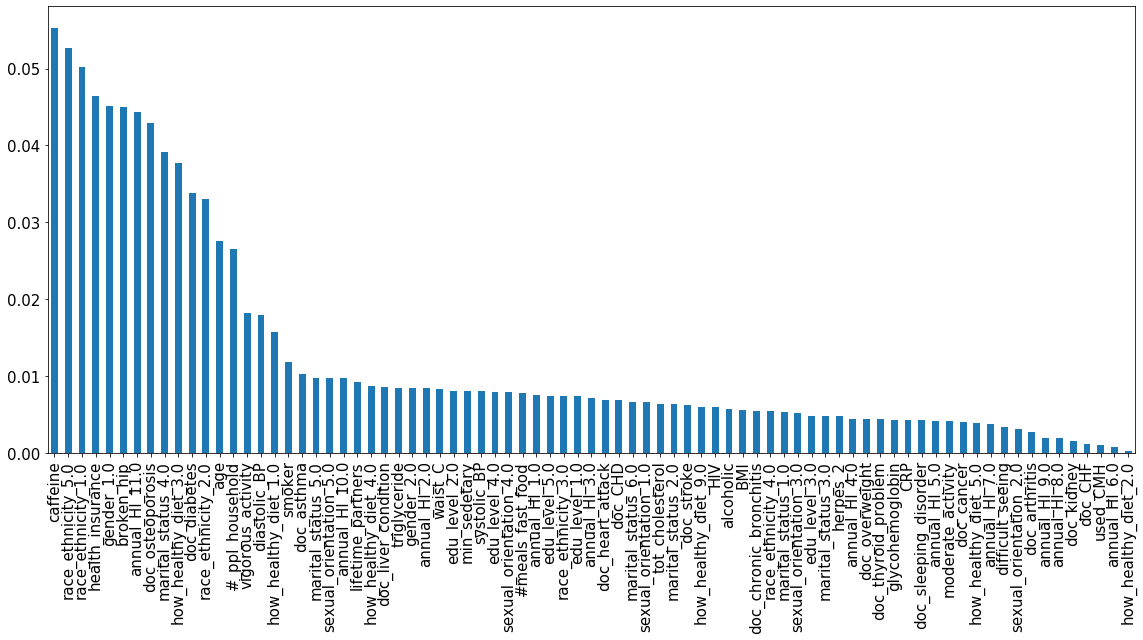

In [113]:
rf = RandomForestClassifier(n_estimators=100)

# perform training
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#plot feature importances
# get feature importances
importances = rf.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df.iloc[:, 1:].columns)

# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16, 9), rot=90, fontsize=15)

# show the plot
plt.tight_layout()
plt.show()

## Logistic Regression

In [116]:
lr = LogisticRegression(C=1000.0, random_state=0)
l = lr.fit(X_train, y_train)


y_pred = l.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0]
 [   0    0    0]
 [6199   73    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00    6272.0

    accuracy                           0.00    6272.0
   macro avg       0.00      0.00      0.00    6272.0
weighted avg       0.00      0.00      0.00    6272.0



/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [118]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
s = svm.fit(X_train, y_train)


y_pred = s.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0]
 [6272    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00    6272.0

    accuracy                           0.00    6272.0
   macro avg       0.00      0.00      0.00    6272.0
weighted avg       0.00      0.00      0.00    6272.0



/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [121]:
knn = KNeighborsClassifier(n_neighbors=1, p=2,metric='minkowski')
k = knn.fit(X_train, y_train)

y_pred = k.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0]
 [   0    0    0]
 [5968  304    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00    6272.0

    accuracy                           0.00    6272.0
   macro avg       0.00      0.00      0.00    6272.0
weighted avg       0.00      0.00      0.00    6272.0



/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carolinesklaver/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
